<a href="https://colab.research.google.com/github/ShimilSBabu/Custom-Training-Loops/blob/main/custom_training_loop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
from __future__ import absolute_import, division, print_function, unicode_literals

In [13]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [29]:
class Model(object):
  def __init__(self):
    self.weight = tf.Variable(2.0)
    self.bias = tf.Variable(1.0)

  def __call__(self, x):
    return self.weight * x + self.bias

In [30]:
model = Model()

In [31]:
def loss(predicted_y, target_y):
  return tf.reduce_mean(tf.square(predicted_y - target_y))

In [32]:
TRUE_w = 3.0
TRUE_b = 2.0
EXAMPLE_COUNT = 1000
xs = tf.random.normal(shape = [EXAMPLE_COUNT])
ys = TRUE_w * xs + TRUE_b

In [33]:
def plot_data(inputs, outputs, predicted_outputs):
    real = plt.scatter(inputs, outputs, c = 'b')
    predicted = plt.scatter(inputs, predicted_outputs, c = 'r')
    plt.legend((real, predicted), ('Real Data', 'Predicted Data'))
    plt.show()

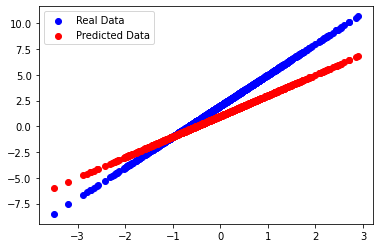

Current Loss is : 2.0591182708740234


In [34]:
plot_data(xs, ys, model(xs))
current_loss = loss(model(xs), ys).numpy()
print(f'Current Loss is : {current_loss}')

In [35]:
def train(model, inputs, outputs, learning_rate):
    with tf.GradientTape() as t:
      current_loss = loss(model(inputs), outputs)
    dw, db = t.gradient(current_loss, [model.weight, model.bias])
    model.weight.assign_sub(learning_rate * dw)
    model.bias.assign_sub(learning_rate * db)

    return current_loss

In [44]:
model = Model()

list_weight, list_bias = [], []
epochs = range(20)
losses = []

for epoch in epochs:
  list_weight.append(model.weight.numpy())
  list_bias.append(model.bias.numpy())
  current_loss = train(model, xs, ys, learning_rate = 0.1)
  losses.append(current_loss)
  print(f'Epoch : {epoch} Weight : {list_weight[-1]} Bias : {list_bias[-1]} Current Loss : {current_loss}')

Epoch : 0 Weight : 2.0 Bias : 1.0 Current Loss : 2.0591182708740234
Epoch : 1 Weight : 2.2106122970581055 Bias : 1.2012113332748413 Current Loss : 1.2981245517730713
Epoch : 2 Weight : 2.376878499984741 Bias : 1.3619252443313599 Current Loss : 0.8184870481491089
Epoch : 3 Weight : 2.50813364982605 Bias : 1.4902950525283813 Current Loss : 0.5161405205726624
Epoch : 4 Weight : 2.611748456954956 Bias : 1.5928318500518799 Current Loss : 0.32552552223205566
Epoch : 5 Weight : 2.693542003631592 Bias : 1.6747357845306396 Current Loss : 0.20533528923988342
Epoch : 6 Weight : 2.758108615875244 Bias : 1.7401598691940308 Current Loss : 0.12954001128673553
Epoch : 7 Weight : 2.8090755939483643 Bias : 1.7924208641052246 Current Loss : 0.08173472434282303
Epoch : 8 Weight : 2.84930682182312 Bias : 1.8341679573059082 Current Loss : 0.051578812301158905
Epoch : 9 Weight : 2.8810629844665527 Bias : 1.8675168752670288 Current Loss : 0.03255359083414078
Epoch : 10 Weight : 2.9061288833618164 Bias : 1.894

In [ ]:
plt.plot(epochs, list_weight, 'r', 
         epochs, list_bias, 'b', )
plt.plot(TRUE_w * len(epochs), 'r--', 
         TRUE_b * len(epochs), 'b--', )
plt.legend(['Predicted Weight', 'Predicted Bias', 'True Weight', 'True Bias'])
plt.show()